In [3]:
import numpy as np 
from io import StringIO
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import re
print(np.__version__)

1.16.2


In [4]:
patients = pd.read_csv('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/PATIENTS.csv')
admissions = pd.read_csv('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/ADMISSIONS.csv')
diagnoses_icd = pd.read_csv('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/DIAGNOSES_ICD.csv')

In [5]:
print("Patients shape: ", patients.shape)
print("Admisssions shape: ", admissions.shape)
print("Diagnoses shape: ", diagnoses_icd.shape)

Patients shape:  (46520, 8)
Admisssions shape:  (58976, 19)
Diagnoses shape:  (651047, 5)


In [6]:
patients.head()

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0


In [7]:
patients['GENDER'].value_counts()

M    26121
F    20399
Name: GENDER, dtype: int64

In [8]:
admissions.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1


In [9]:
diagnoses_icd.head()

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1297,109,172335,1.0,40301
1,1298,109,172335,2.0,486
2,1299,109,172335,3.0,58281
3,1300,109,172335,4.0,5855
4,1301,109,172335,5.0,4254


In [10]:
diagnoses_icd["ICD9_CODE"].value_counts()

4019     20703
4280     13111
42731    12891
41401    12429
5849      9119
         ...  
96901        1
1329         1
20047        1
2972         1
80662        1
Name: ICD9_CODE, Length: 6985, dtype: int64

In [11]:
diagnoses_icd["ICD9_CODE"].nunique()

6985

In [12]:
def convert_to_icd9(dxStr):
    if dxStr.startswith('E'):
        if len(dxStr) > 4: return dxStr[:4] + '.' + dxStr[4:]
        else: return dxStr
    else:
        if len(dxStr) > 3: return dxStr[:3] + '.' + dxStr[3:]
        else: return dxStr

In [13]:
def convert_to_3digit_icd9(dxStr):
    if dxStr.startswith('E'):
        if len(dxStr) > 4: return dxStr[:4]
        else: return dxStr
    else:
        if len(dxStr) > 3: return dxStr[:3]
        else: return dxStr

In [14]:
diagnoses_icd["ICD9_CODE"] = diagnoses_icd["ICD9_CODE"].astype(str)

In [15]:
diagnoses_icd["ICD9_CODE"] = diagnoses_icd["ICD9_CODE"].astype(str)
diagnoses_3digit = diagnoses_icd["ICD9_CODE"].apply(convert_to_3digit_icd9)

In [16]:
diagnoses_icd.head()

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1297,109,172335,1.0,40301
1,1298,109,172335,2.0,486
2,1299,109,172335,3.0,58281
3,1300,109,172335,4.0,5855
4,1301,109,172335,5.0,4254


In [17]:
diagnoses_3digit.nunique()

1071

In [67]:
n = 10
diagnoses_icd["ICD9_CODE"].value_counts()[:n]

4019     20703
4280     13111
42731    12891
41401    12429
5849      9119
25000     9058
2724      8690
51881     7497
5990      6555
53081     6326
Name: ICD9_CODE, dtype: int64

In [118]:
# Filter patients for TOP10, heart diseases, diabetes and cardiovascular ones
# also getting the SUBJECT IDs of each
diagnosesTOP_1 = diagnoses_icd[diagnoses_icd.ICD9_CODE.str.contains("^4019", regex=True, na=False)]
diagnosesTOP_2 = diagnoses_icd[diagnoses_icd.ICD9_CODE.str.contains("^4280", regex=True, na=False)]
diagnosesTOP_3 = diagnoses_icd[diagnoses_icd.ICD9_CODE.str.contains("^42731", regex=True, na=False)]
diagnosesTOP_4 = diagnoses_icd[diagnoses_icd.ICD9_CODE.str.contains("^41401", na=False)]
diagnosesTOP_5 = diagnoses_icd[diagnoses_icd.ICD9_CODE.str.contains("^5849", na=False)]
diagnosesTOP_6 = diagnoses_icd[diagnoses_icd.ICD9_CODE.str.contains("^25000", na=False)]
diagnosesTOP_7 = diagnoses_icd[diagnoses_icd.ICD9_CODE.str.contains("^2724", na=False)]
diagnosesTOP_8 = diagnoses_icd[diagnoses_icd.ICD9_CODE.str.contains("^51881", na=False)]
diagnosesTOP_9 = diagnoses_icd[diagnoses_icd.ICD9_CODE.str.contains("^5990", na=False)]
diagnosesTOP_10 = diagnoses_icd[diagnoses_icd.ICD9_CODE.str.contains("^53081", na=False)]

In [120]:
# Filter patients for TOP10, heart diseases, diabetes and cardiovascular ones
# also getting the SUBJECT IDs of each
diagnosesTOP_1["SUBJECT_ID"].nunique()


17613

In [121]:
diagnosesTOP_2["SUBJECT_ID"].nunique()


9843

In [122]:
diagnosesTOP_3["SUBJECT_ID"].nunique()


10271

In [123]:
diagnosesTOP_4["SUBJECT_ID"].nunique()


10775

In [124]:
diagnosesTOP_5["SUBJECT_ID"].nunique()


7687

In [125]:
diagnosesTOP_6["SUBJECT_ID"].nunique()


7370

In [126]:
diagnosesTOP_7["SUBJECT_ID"].nunique()


7465

In [127]:
diagnosesTOP_8["SUBJECT_ID"].nunique()


6719

In [128]:
diagnosesTOP_9["SUBJECT_ID"].nunique()


5779

In [129]:
diagnosesTOP_10["SUBJECT_ID"].nunique()

5272

In [116]:
print(diagnosesTOP_1)

        ROW_ID  SUBJECT_ID  HADM_ID  SEQ_NUM ICD9_CODE
53        1513         115   114585     12.0      4019
70        1530         117   140784      8.0      4019
89        1549         117   164853     18.0      4019
112       1572         123   195632      3.0      4019
122       1582         124   112906      8.0      4019
...        ...         ...      ...      ...       ...
650950  638458       97158   152158     22.0      4019
650966  638474       97164   109302      7.0      4019
650986  639742       97484   172304      4.0      4019
650994  639750       97488   152542      6.0      4019
651012  639768       97488   161999     13.0      4019

[20703 rows x 5 columns]


In [68]:
diagnoses_icd["SUBJECT_ID"].nunique()

46520

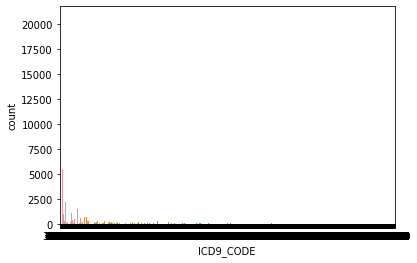

In [69]:
ax = sns.countplot(x="ICD9_CODE", data = diagnoses_icd)

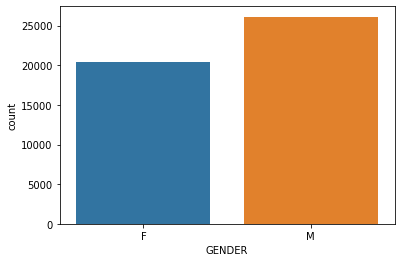

In [70]:
sns.countplot(x="GENDER", data = patients)

In [18]:
patients.shape

(46520, 8)

In [19]:
patients_m = patients[patients.GENDER == "M"]
male_subject_ids = patients_m["SUBJECT_ID"].tolist()
#male_subject_ids.nunique()

In [20]:
patients_f = patients[patients.GENDER == "F"]
female_subject_ids = patients_f["SUBJECT_ID"].tolist()

In [21]:
patients_m.head()

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0
5,239,255,M,2109-08-05 00:00:00,NaN,NaN,NaN,0
6,240,256,M,2086-07-31 00:00:00,NaN,NaN,NaN,0
10,244,261,M,2025-08-04 00:00:00,2102-06-29 00:00:00,2102-06-29 00:00:00,2102-06-29 00:00:00,1


/Users/nicenoize/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/nicenoize/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/nicenoize/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/nicenoize/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


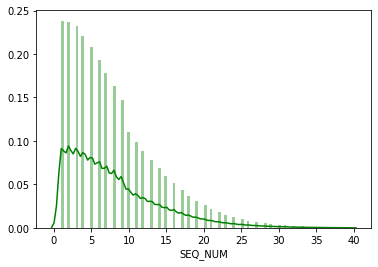

In [75]:
sns.distplot(diagnoses_icd['SEQ_NUM'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [76]:
#sns.countplot(x="ICD9_CODE", data=diagnoses_icd)

In [77]:
print(male_subject_ids)

[251, 252, 255, 256, 261, 262, 263, 265, 269, 270, 665, 669, 670, 671, 672, 673, 676, 677, 687, 688, 690, 697, 699, 700, 702, 703, 704, 705, 708, 711, 712, 716, 718, 719, 721, 724, 725, 728, 730, 733, 738, 741, 743, 744, 745, 746, 747, 748, 749, 751, 759, 760, 763, 767, 771, 772, 773, 774, 775, 776, 779, 782, 786, 795, 796, 797, 798, 802, 804, 805, 806, 807, 809, 811, 812, 813, 814, 815, 819, 820, 822, 824, 825, 828, 830, 833, 834, 835, 836, 843, 845, 846, 849, 852, 853, 854, 856, 857, 858, 862, 863, 864, 646, 647, 648, 649, 650, 651, 652, 653, 657, 659, 662, 2, 3, 5, 8, 9, 12, 16, 18, 19, 21, 23, 24, 25, 26, 28, 30, 31, 32, 33, 34, 36, 37, 38, 41, 42, 43, 44, 45, 46, 49, 50, 51, 52, 53, 61, 62, 63, 65, 67, 72, 77, 78, 79, 80, 81, 82, 85, 87, 88, 94, 95, 96, 97, 99, 101, 102, 104, 106, 107, 108, 110, 112, 113, 114, 116, 119, 122, 123, 124, 129, 130, 131, 133, 134, 135, 136, 137, 138, 140, 141, 143, 144, 146, 147, 152, 154, 155, 156, 157, 158, 159, 161, 163, 164, 165, 168, 169, 171, 172

In [22]:
male_diagnoses_icd = diagnoses_icd[diagnoses_icd["SUBJECT_ID"].isin(male_subject_ids)]
male_admissions = admissions[admissions["SUBJECT_ID"].isin(male_subject_ids)]

In [23]:
female_diagnoses_icd = diagnoses_icd[diagnoses_icd["SUBJECT_ID"].isin(female_subject_ids)]
female_admissions = admissions[admissions["SUBJECT_ID"].isin(female_subject_ids)]

In [80]:
# slow!
#sns.countplot(x="ICD9_CODE", data=male_diagnoses_icd)

In [81]:
# slow!
#sns.countplot(x="ICD9_CODE", data=female_diagnoses_icd)

In [82]:
# get top 10 most ICD9-Codes for male patients
#n = 10000
#male_diagnoses_icd['ICD9_CODE'].value_counts()[:n].index.tolist()

In [83]:
# get top 10 most ICD9-Codes for female patients
#n = 10000
#female_diagnoses_icd['ICD9_CODE'].value_counts()[:n].index.tolist()

In [24]:
print(list(set(male_diagnoses_icd) - set(female_diagnoses_icd)))

[]


In [25]:
males_diabetes = male_diagnoses_icd[male_diagnoses_icd.ICD9_CODE.str.contains("^250\d", na=False)]
print(males_diabetes)

        ROW_ID  SUBJECT_ID  HADM_ID  SEQ_NUM ICD9_CODE
113       1573         123   195632      4.0     25000
206       1666         130   113323      7.0     25000
214       1674         130   198214      5.0     25060
258       1718         135   199634      9.0     25000
267       1727         137   151583      5.0     25060
...        ...         ...      ...      ...       ...
650802  637063       96908   138027      8.0     25040
650811  637072       96908   149629      1.0     25040
650817  637078       96908   149629      7.0     25060
650990  639746       97488   152542      2.0     25062
651014  639770       97488   161999     15.0     25000

[9174 rows x 5 columns]


In [30]:
# Filter female patients for with ischemic diseases, heart diseases, diabetes and cardiovascular ones
# also getting the SUBJECT IDs of each
females_ischemic = female_diagnoses_icd[female_diagnoses_icd.ICD9_CODE.str.contains("^(39[0-9]|4[0-4][0-9]|45[0-9])", regex=True, na=False)]
females_six = female_diagnoses_icd[female_diagnoses_icd.ICD9_CODE.str.contains("^(2[4-6][0-9]|27[0-9])", regex=True, na=False)]
females_two = female_diagnoses_icd[female_diagnoses_icd.ICD9_CODE.str.contains("^(39[0-9]|4[0-4][0-9]|45[0-9])", regex=True, na=False)]
females_cardiovascular = female_diagnoses_icd[female_diagnoses_icd.ICD9_CODE.str.contains("^4299", regex=True, na=False)]
females_heart_disease = female_diagnoses_icd[female_diagnoses_icd.ICD9_CODE.str.contains("^429", regex=True, na=False)]
females_diabetes = female_diagnoses_icd[female_diagnoses_icd.ICD9_CODE.str.contains("^250\d", na=False)]
females_ischemic_ids = females_ischemic["SUBJECT_ID"].tolist()
females_heart_disease_ids = females_heart_disease["SUBJECT_ID"].tolist()
females_cardiovascular_ids = females_cardiovascular["SUBJECT_ID"].tolist()
females_diabetes_ids = females_diabetes["SUBJECT_ID"].tolist()
len(females_diabetes)

7280

In [31]:
# Filter male patients for with ischemic diseases, heart diseases, diabetes and cardiovascular ones
# also getting the SUBJECT IDs of each
males_ischemic = male_diagnoses_icd[male_diagnoses_icd.ICD9_CODE.str.contains("^(39[0-9]|4[0-4][0-9]|45[0-9])", regex=True, na=False)]
males_six = male_diagnoses_icd[male_diagnoses_icd.ICD9_CODE.str.contains("^(2[4-6][0-9]|27[0-9])", regex=True, na=False)]
males_two = male_diagnoses_icd[male_diagnoses_icd.ICD9_CODE.str.contains("^(39[0-9]|4[0-4][0-9]|45[0-9])", regex=True, na=False)]
males_cardiovascular = male_diagnoses_icd[male_diagnoses_icd.ICD9_CODE.str.contains("^4299", regex=True, na=False)]
males_heart_disease = male_diagnoses_icd[male_diagnoses_icd.ICD9_CODE.str.contains("^429", regex=True, na=False)]
males_diabetes = male_diagnoses_icd[male_diagnoses_icd.ICD9_CODE.str.contains("^250\d", na=False)]
males_ischemic_ids = males_ischemic["SUBJECT_ID"].tolist()
males_heart_disease_ids = males_heart_disease["SUBJECT_ID"].tolist()
males_cardiovascular_ids = males_cardiovascular["SUBJECT_ID"].tolist()
males_diabetes_ids = males_diabetes["SUBJECT_ID"].tolist()
len(males_diabetes)

9174

In [37]:
females_corr = pd.merge(left=females_two, right=females_six, left_on='SUBJECT_ID', right_on='SUBJECT_ID')

In [38]:
males_corr = pd.merge(left=males_two, right=males_six, left_on='SUBJECT_ID', right_on='SUBJECT_ID')

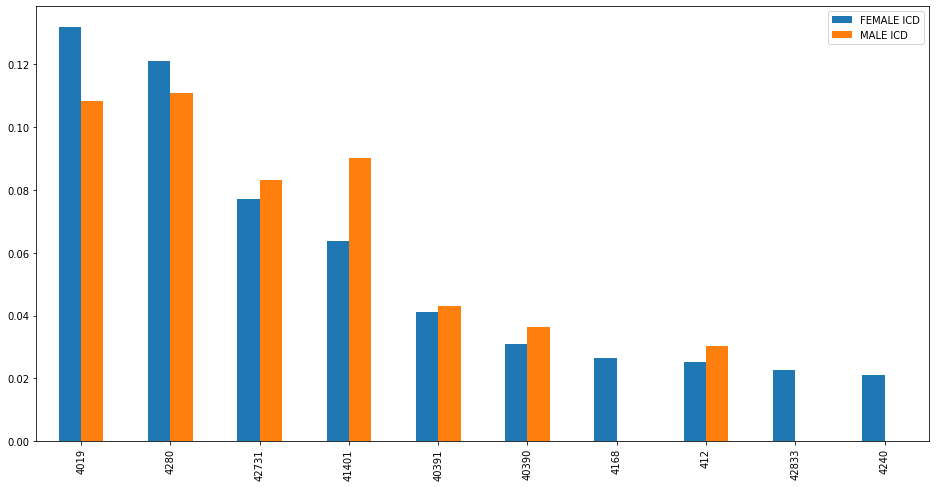

In [41]:
# Compare top 25 ICD9-Codes occurences for ischemic diseases
n = 10

graph_df = females_corr['ICD9_CODE_x'].value_counts(normalize=True)[:n].rename('FEMALE ICD').to_frame()\
               .join(males_corr['ICD9_CODE_x'].value_counts(normalize=True)[:n].rename('MALE ICD').to_frame())

graph_df.plot(kind='bar',figsize=(16, 8))

In [40]:
female_cad = female_diagnoses_icd[female_diagnoses_icd.ICD9_CODE.str.contains("^41401", regex=True, na=False)]

In [166]:
print(female_cad['SUBJECT_ID'].nunique())

3660


In [175]:
females_cad_dia = pd.merge(left=female_cad, right=females_diabetes, left_on='SUBJECT_ID', right_on='SUBJECT_ID')

In [176]:
male_cad = male_diagnoses_icd[male_diagnoses_icd.ICD9_CODE.str.contains("^41401", regex=True, na=False)]

In [177]:
print(male_cad['SUBJECT_ID'].nunique())

7115


In [178]:
males_cad_dia = pd.merge(left=male_cad, right=males_diabetes, left_on='SUBJECT_ID', right_on='SUBJECT_ID')

In [174]:
print(males_cad_dia['SUBJECT_ID'].nunique())

2705


In [88]:
# Value counts for ischemic heart diseases for women
#females_ischemic['ICD9_CODE'].value_counts()[:n].index.tolist()

In [140]:
# Value counts for ischemic heart diseases for men
#males_ischemic['ICD9_CODE'].value_counts()[:n].index.tolist()

['4019',
 '41401',
 '42731',
 '4280',
 '412',
 '40390',
 '41071',
 '40391',
 '4240',
 '4241']

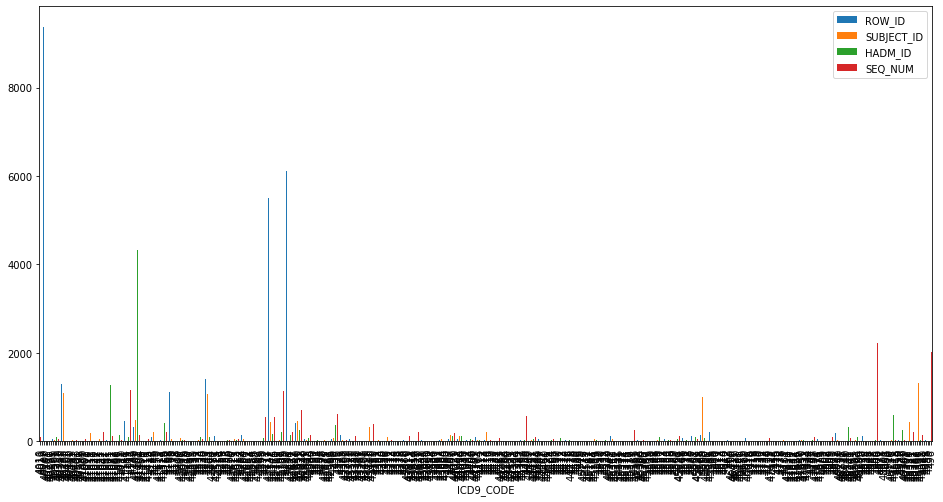

In [90]:
females_ischemic.groupby([females_ischemic.ICD9_CODE]).count().plot(kind='bar', figsize=(16, 8))

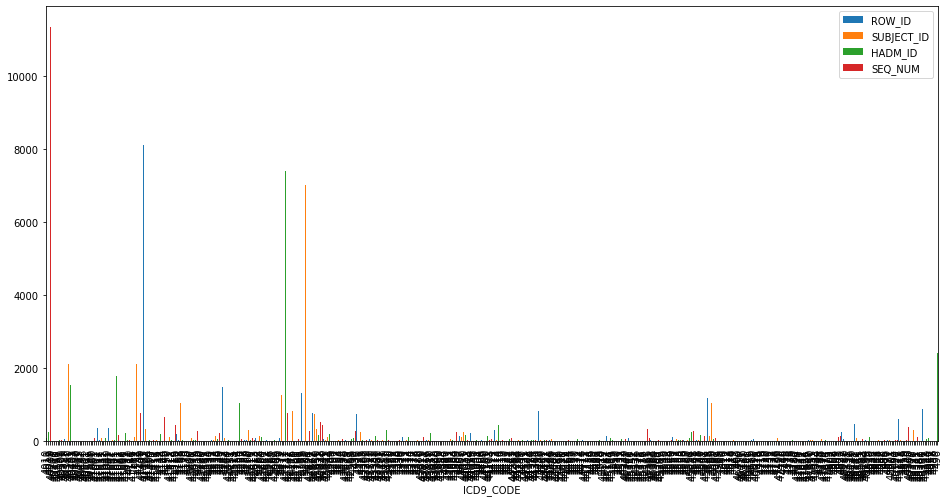

In [91]:
males_ischemic.groupby([males_ischemic.ICD9_CODE]).count().plot(kind='bar', figsize=(16, 8))

In [92]:
#ax = sns.countplot(x="ICD9_CODE", data=females_ischemic)

In [93]:
#ax = sns.countplot(x="ICD9_CODE", data=males_ischemic)

In [141]:
# get top 10 most ICD9-Codes for male patients
n = 10
males_ischemic_top10 = male_diagnoses_icd['ICD9_CODE'].value_counts()[:n]
print(males_ischemic_top10)

4019     11333
41401     8107
42731     7379
4280      7005
5849      5178
25000     5156
2724      5153
51881     4024
2720      3494
53081     3336
Name: ICD9_CODE, dtype: int64


In [142]:
# get top 10 most ICD9-Codes for female patients
n = 10
females_ischemic_top10 = females_ischemic['ICD9_CODE'].value_counts()[:n]
print(females_ischemic_top10)

4019     9370
4280     6106
42731    5512
41401    4322
4240     1416
40390    1300
41071    1262
412      1156
42789    1137
4168     1101
Name: ICD9_CODE, dtype: int64


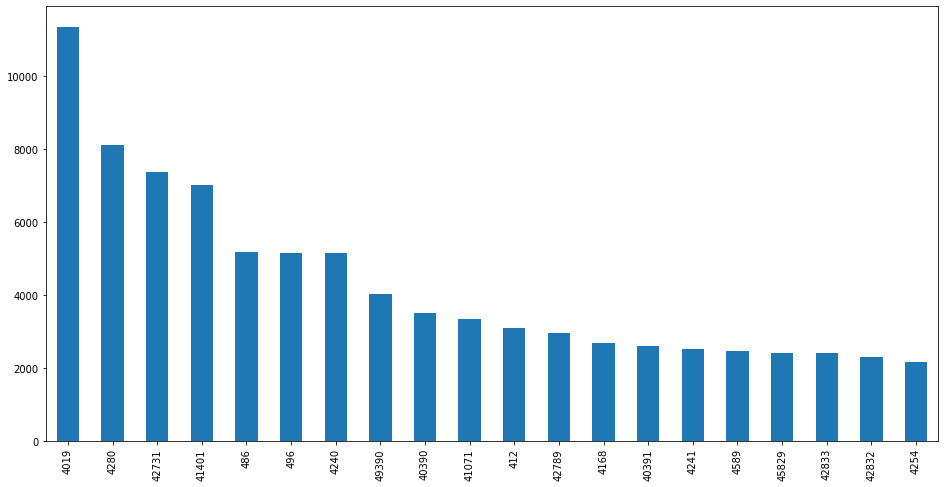

In [96]:
fig, axs = plt.subplots()
males_ischemic_top10.plot(x="ICD9_CODE", y=["VALUE_COUNTS"], kind="bar", figsize=(16, 8))
females_ischemic_top10.plot(x="ICD9_CODE", y=["VALUE_COUNTS"], kind="bar", figsize=(16, 8))

In [97]:
females_ischemic['ICD9_CODE'].value_counts()

4019     9370
4280     6106
42731    5512
41401    4322
486      2223
         ... 
42654       1
45374       1
4719        1
45181       1
460         1
Name: ICD9_CODE, Length: 496, dtype: int64

In [154]:
females_circ_dia = pd.merge(left=females_ischemic, right=females_diabetes, left_on='SUBJECT_ID', right_on='SUBJECT_ID')

In [155]:
males_circ_dia = pd.merge(left=males_ischemic, right=males_diabetes, left_on='SUBJECT_ID', right_on='SUBJECT_ID')

In [160]:
print(males_circ_dia['ICD9_CODE_x'].value_counts())

4280     10597
41401     8901
4019      7415
42731     5852
40391     5571
         ...  
4374         1
4150         1
45385        1
4419         1
42491        1
Name: ICD9_CODE_x, Length: 329, dtype: int64


In [161]:
print(females_circ_dia['ICD9_CODE_x'].value_counts())

4280     8436
4019     8181
41401    4587
40391    4560
42731    4298
         ... 
40290       1
4255        1
43810       1
42651       1
41513       1
Name: ICD9_CODE_x, Length: 328, dtype: int64


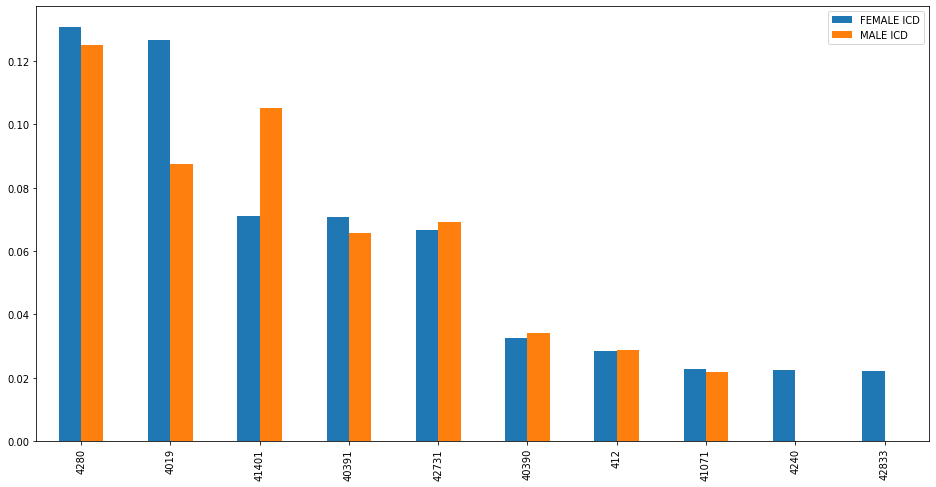

In [163]:
# Compare top 25 ICD9-Codes occurences for ischemic diseases
n = 10

graph_df = females_circ_dia['ICD9_CODE_x'].value_counts(normalize=True)[:n].rename('FEMALE ICD').to_frame()\
               .join(males_circ_dia['ICD9_CODE_x'].value_counts(normalize=True)[:n].rename('MALE ICD').to_frame())

graph_df.plot(kind='bar',figsize=(16, 8))

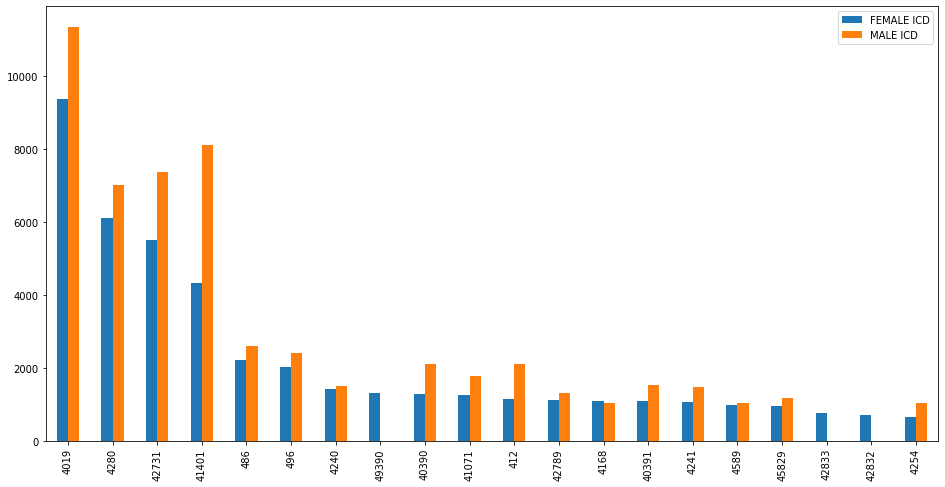

In [98]:
# Compare top 25 ICD9-Codes occurences for ischemic diseases
n = 20

graph_df = females_ischemic['ICD9_CODE'].value_counts(normalize=False)[:n].rename('FEMALE ICD').to_frame()\
               .join(males_ischemic['ICD9_CODE'].value_counts(normalize=False)[:n].rename('MALE ICD').to_frame())

graph_df.plot(kind='bar',figsize=(16, 8))

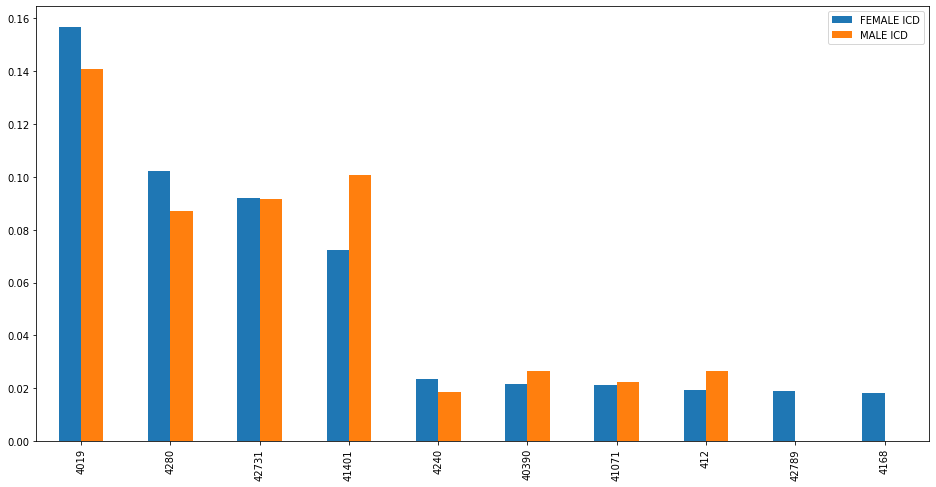

In [143]:
# Compare top 25 ICD9-Codes occurences for ischemic diseases
n = 10

graph_df = females_ischemic['ICD9_CODE'].value_counts(normalize=True)[:n].rename('FEMALE ICD').to_frame()\
               .join(males_ischemic['ICD9_CODE'].value_counts(normalize=True)[:n].rename('MALE ICD').to_frame())

graph_df.plot(kind='bar',figsize=(16, 8))

In [ ]:
# Compare top 25 ICD9-Codes occurences for ischemic diseases
n = 20

graph_df = females_ischemic['ICD9_CODE'].value_counts(normalize=True)[:n].rename('FEMALE ICD').to_frame()\
               .join(males_ischemic['ICD9_CODE'].value_counts(normalize=True)[:n].rename('MALE ICD').to_frame())

graph_df.plot(kind='bar',figsize=(16, 8))

In [100]:
males_ischemic['ICD9_CODE'].nunique()

486

In [101]:
n = 10
Index= diagnoses_icd['ICD9_CODE'].unique()[:n]
Cols = diagnoses_icd['ICD9_CODE'].unique()[:n]
df = DataFrame(diagnoses_icd, index=Index, columns=Cols)

sns.heatmap(diagnoses_icd)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
#diagnoses_pivot = diagnoses_icd.pivot('SUBJECT_ID', 'ICD9_CODE')
#sns.heatmap([diagnoses_icd['ICD9_CODE'].unique(), diagnoses_icd['ICD9_CODE'].unique()], annot=True, fmt="d")

In [ ]:
diagnoses_ICD_SNS = sns.load_dataset('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/DIAGNOSES_ICD.csv')
diagnoses_ICD_SNS.head()

In [ ]:
 fig = plt.figure(figsize=(10, 10))  
 sns.set(style='white')  
 # Draw the heatmap with the mask and correct aspect ratio   
 ax = sns.heatmap(cooccurrence_matrix_percentage, cmap='viridis', center=0, square=True, linewidths=0.15, cbar_kws={"shrink": 0.5, "label": "Co-occurrence frequency"}, )  
 ax.set_title('Heatmap of the attributes')  
 ax.set_xlabel('Attributes')  
 ax.set_ylabel('Attributes')  
 plt.show()  

 fig = plt.figure(figsize=(10, 10))  
 sns.set(style='white')  
 # Draw the heatmap with the mask and correct aspect ratio   
 ax = sns.heatmap(cooccurrence_matrix_percentage, cmap='viridis', center=0, square=True, linewidths=0.15, cbar_kws={"shrink": 0.5, "label": "Co-occurrence frequency"}, )  
 ax.set_title('Heatmap of the attributes')  
 ax.set_xlabel('Attributes')  
 ax.set_ylabel('Attributes')  
 plt.show()

In [ ]:
male_diagnoses_icd.to_csv('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/males.csv')

In [ ]:
female_diagnoses_icd.to_csv('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/females.csv')


In [ ]:
male_diagnoses_icd.head()

In [ ]:
diagnoses_icd['ICD9_CODE'].nunique()

In [ ]:
admissions.head()

In [ ]:
male_admissions.head()
male_admissions.to_csv('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/male_admissions.csv')

In [ ]:
female_admissions.head()
female_admissions.to_csv('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/female_admissions.csv')

In [ ]:
admissions["SUBJECT_ID"].nunique()

In [ ]:
diagnoses_icd["SUBJECT_ID"].nunique()

In [ ]:
male_admissions["SUBJECT_ID"].nunique()

In [ ]:
male_diagnoses_icd["SUBJECT_ID"].nunique()

In [ ]:
male_diagnoses_icd["ICD9_CODE"].nunique()

In [ ]:
female_diagnoses_icd["ICD9_CODE"].nunique()

In [ ]:
male_diagnoses_icd["SUBJECT_ID"].head()

In [ ]:
# Compare top 25 ICD9-Codes occurences for ischemic diseases
n = 15

graph_df = females_heart_disease['ICD9_CODE'].value_counts(normalize=True)[:n].rename('FEMALE ICD').to_frame()\
               .join(males_heart_disease['ICD9_CODE'].value_counts(normalize=True)[:n].rename('MALE ICD').to_frame())

graph_df.plot(kind='bar',figsize=(16, 8))

In [ ]:
co_mat = pd.crosstab(males_heart_disease["ICD9_CODE"].value_counts(), males_diabetes["ICD9_CODE"].value_counts())
print(co_mat)

In [ ]:
print(males_heart_disease["ICD9_CODE"].value_counts())

In [ ]:
# Get ids of male patients with heart disease + any type of diabetes
male_heart_and_diabetes = male_diagnoses_icd[male_diagnoses_icd["SUBJECT_ID"].isin(males_cardiovascular_ids)]
male_heart_and_diabetes = male_heart_and_diabetes[male_heart_and_diabetes["SUBJECT_ID"].isin(males_diabetes_ids)]
male_heart_and_diabetes["SUBJECT_ID"].nunique() 

In [145]:
male_circ_and_diabetes = male_diagnoses_icd[male_diagnoses_icd["SUBJECT_ID"].isin(males_ischemic_ids)]
male_circ_and_diabetes = male_diagnoses_icd[male_diagnoses_icd["SUBJECT_ID"].isin(males_cardiovascular_ids)]
male_circ_and_diabetes = male_circ_and_diabetes[male_circ_and_diabetes["SUBJECT_ID"].isin(males_diabetes_ids)]

In [146]:
female_circ_and_diabetes = female_diagnoses_icd[female_diagnoses_icd["SUBJECT_ID"].isin(females_ischemic_ids)]
female_circ_and_diabetes = female_diagnoses_icd[female_diagnoses_icd["SUBJECT_ID"].isin(females_cardiovascular_ids)]
female_circ_and_diabetes = female_circ_and_diabetes[female_circ_and_diabetes["SUBJECT_ID"].isin(females_diabetes_ids)]

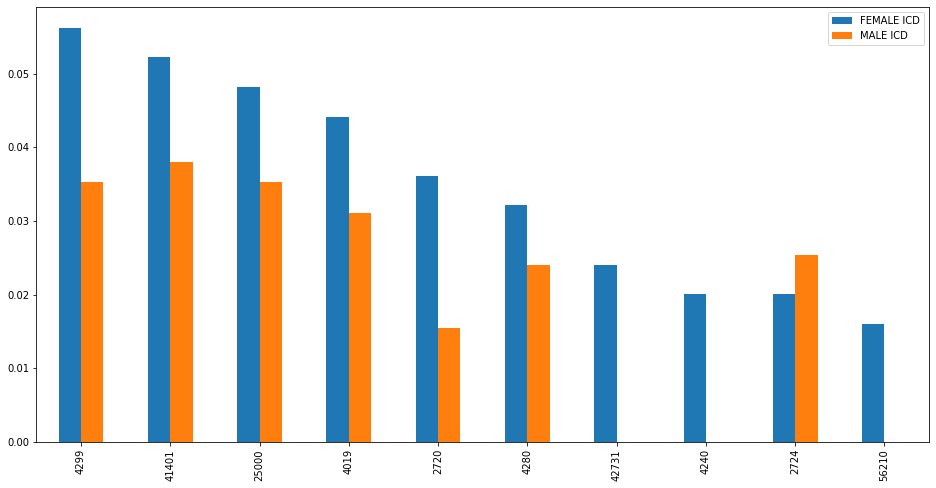

In [147]:
# Compare top 25 ICD9-Codes occurences for patients with heart disease and diabetes
n = 10

graph_df = female_circ_and_diabetes['ICD9_CODE'].value_counts(normalize=True)[:n].rename('FEMALE ICD').to_frame()\
               .join(male_circ_and_diabetes['ICD9_CODE'].value_counts(normalize=True)[:n].rename('MALE ICD').to_frame())

graph_df.plot(kind='bar',figsize=(16, 8))

In [ ]:
# # Get ids of female patients with heart disease + any type of diabetes
female_heart_and_diabetes = female_diagnoses_icd[female_diagnoses_icd["SUBJECT_ID"].isin(females_cardiovascular_ids)]
female_heart_and_diabetes = female_heart_and_diabetes[female_heart_and_diabetes ["SUBJECT_ID"].isin(females_diabetes_ids)]
female_heart_and_diabetes["SUBJECT_ID"].nunique()

In [ ]:
print(male_heart_and_diabetes.nunique())

In [ ]:
print(female_heart_and_diabetes.nunique())

In [ ]:
# Compare top 25 ICD9-Codes occurences for patients with heart disease and diabetes
n = 25

graph_df = female_heart_and_diabetes['ICD9_CODE'].value_counts(normalize=True)[:n].rename('FEMALE ICD').to_frame()\
               .join(male_heart_and_diabetes['ICD9_CODE'].value_counts(normalize=True)[:n].rename('MALE ICD').to_frame())

graph_df.plot(kind='bar',figsize=(16, 8))

In [ ]:
female_patients = np.load('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/binary.npy')

In [ ]:
print(female_patients)

In [ ]:
male_diagnoses_icd

In [ ]:
male_diagnoses_icd.head()

In [ ]:
males_generated = np.load('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/all_icd_binary.npy')

In [ ]:
# should be 10000, 1071 (1071 ICD9-Codes after generalizing to 3 digits)
# shoule be 10000, 6984 without generalization
# is: 857
print(males_generated.shape)

In [ ]:
#
print(males_generated[0,:])

In [ ]:
diagnoses_icd['ICD9_CODE'].nunique()

In [ ]:
male_diagnoses_icd['ICD9_CODE'].nunique()

In [ ]:
female_diagnoses_icd['ICD9_CODE'].nunique()

In [ ]:
# Inverting dictionaries to map index -> Diagnosiscode
females_types = np.load('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/females_binary.types')
females_types_inv = {v: k for k, v in females_types.items()}
males_types = np.load('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/males_binary.types')
males_types_inv = {v: k for k, v in males_types.items()}
mixed_types = np.load('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/fullpatients_binary.types')
mixed_types_inv = {v: k for k, v in mixed_types.items()}
#print(males_types_inv)

female_generated_patients = np.load('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/female_generated_binary.npy')
print(female_generated_patients.shape)

In [ ]:
female_generated_patients = np.load('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/females_generated_binary.npy')
female_generated_patients = np.rint(female_generated_patients)
print(female_generated_patients.shape)
#male_generated_patients = np.array_str(male_generated_patients)
#for x in np.nditer(male_generated_patients, op_flags=['readwrite'], flags=['multi_index']):
#        if(x==1): x = males_types[x]
female_generated_patients_icd = np.chararray(female_generated_patients.shape, itemsize=5)            
it = np.nditer(male_generated_patients, flags=['multi_index'])
while not it.finished:
    #print ("%d <%s>" % (it[0], it.multi_index)),
    if(it[0] == 1): female_generated_patients_icd[it.multi_index] = females_types_inv[it.multi_index[1]]
    #print()
    it.iternext()
    
# Save female patients to csv
pd.DataFrame(female_generated_patients_icd).to_csv("/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/female.csv")

In [ ]:
male_generated_patients = np.load('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/males_generated_binary.npy')
male_generated_patients = np.rint(male_generated_patients)
print(male_generated_patients.shape)
#male_generated_patients = np.array_str(male_generated_patients)
#for x in np.nditer(male_generated_patients, op_flags=['readwrite'], flags=['multi_index']):
#        if(x==1): x = males_types[x]
male_generated_patients_icd = np.chararray(male_generated_patients.shape, itemsize=5)            
it = np.nditer(male_generated_patients, flags=['multi_index'])
while not it.finished:
    #print ("%d <%s>" % (it[0], it.multi_index)),
    if(it[0] == 1): male_generated_patients_icd[it.multi_index] = males_types_inv[it.multi_index[1]]
    #print()
    it.iternext()
    
# Save male patients to csv
#pd.DataFrame(male_generated_patients_icd).to_csv("/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/male.csv")

In [ ]:
mixed_generated_patients = np.load('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/mixed_binary.npy')
mixed_generated_patients = np.rint(mixed_generated_patients)
print(mixed_generated_patients.shape)
#male_generated_patients = np.array_str(male_generated_patients)
#for x in np.nditer(male_generated_patients, op_flags=['readwrite'], flags=['multi_index']):
#        if(x==1): x = males_types[x]
mixed_generated_patients_icd = np.chararray(mixed_generated_patients.shape, itemsize=5)            
it = np.nditer(mixed_generated_patients, flags=['multi_index'])
while not it.finished:
    #print ("%d <%s>" % (it[0], it.multi_index)),
    if(it[0] == 1): mixed_generated_patients_icd[it.multi_index] = mixed_types_inv[it.multi_index[1]]
    #print()
    it.iternext()
    
# Save mixed patients to csv
pd.DataFrame(mixed_generated_patients_icd).to_csv("/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/mixed_binary.csv")

In [ ]:
fullpatients_ids = np.load('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/fullpatients_binary.pids')
print(fullpatients_ids)

In [ ]:
diagnoses_icd.loc[diagnoses_icd['ICD9_CODE'] == '1']

In [ ]:
females_ischemic = female_diagnoses_icd[female_diagnoses_icd.ICD9_CODE.str.contains("^1$", regex=True, na=False)]
females_ischemic.head()

In [ ]:
diagnoses_icd["ICD9_CODE"] = diagnoses_icd["ICD9_CODE"].astype(str)
male_diagnoses_icd["ICD9_CODE"] = male_diagnoses_icd["ICD9_CODE"].astype(str)
female_diagnoses_icd["ICD9_CODE"] = female_diagnoses_icd["ICD9_CODE"].astype(str)

In [ ]:
mixed_diagnoses_3digit = diagnoses_icd["ICD9_CODE"].apply(convert_to_3digit_icd9)
female_diagnoses_3digit = female_diagnoses_icd["ICD9_CODE"].apply(convert_to_3digit_icd9)
male_diagnoses_3digit = male_diagnoses_icd["ICD9_CODE"].apply(convert_to_3digit_icd9)

In [ ]:
mixed_diagnoses_3digit.nunique()

In [ ]:
female_diagnoses_3digit.nunique()

In [ ]:
male_diagnoses_3digit.nunique()